
하이퍼 매개변수 최적화에 걸린 시간은 34.43952798843384 초입니다.



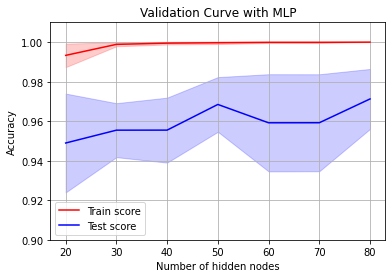


최적의 은닉층의 노드 개수는 80 개입니다.

[[66.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 70.  2.  0.  0.  0.  0.  0.  2.  1.]
 [ 0.  0. 83.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1. 74.  0.  1.  0.  0.  1.  2.]
 [ 0.  0.  0.  0. 60.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 69.  0.  0.  2.  1.]
 [ 0.  0.  0.  0.  0.  2. 71.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 62.  0.  0.]
 [ 0.  3.  0.  0.  1.  1.  0.  0. 65.  1.]
 [ 0.  0.  0.  0.  2.  2.  0.  2.  0. 67.]]
테스트 집합에 대한 정확률은 95.54937413073714 %입니다.


In [6]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start=time.time() # 시작 시각
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=50,solver='sgd')
prange=range(20,81,10)
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring="accuracy",n_jobs=4)
end=time.time() # 끝난 시각
print("\n하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다.\n")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

# 성능 그래프 그리기
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score",color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다.\n")

# 최적의 은닉 노드 개수로 모델링
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

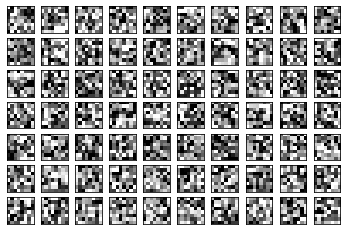

In [5]:
row = int(best_number_nodes/10)
col = 10
fig, axes = plt.subplots(row, col)

vmin, vmax = mlp_test.coefs_[0].min(), mlp_test.coefs_[0].max()

for coef, ax in zip(mlp_test.coefs_[0].T, axes.ravel()):
  ax.matshow(coef. reshape(8, 8), cmap=plt.cm.gray, vmin=0.5*vmin, vmax=0.5*vmax)
  ax.set_xticks(())
  ax.set_yticks(())

plt.show()